            COMPLETE INFORMATION ABOUT THIS PROJECT
### HUMAN ACTION RECOGNITON USING TWO MODEL CONVOLUTIONAL NEURAL NETWORK AND LONG SHORT TERM MEMORY

so first let's discuss some basic question regarding this project

### what is convoltional neural network?
It is a type of artificial neural network specifically designed for processing structured grid data, such as images, videos, and other grid-based data. CNNs are highly effective for tasks involving visual recognition and analysis.
In cnn we use convolutional layer, pooling layer, activation function fully connected layer and flatten layer.

1.convolutional layers: A convolutional layer is a set of learnable filters. Each filter is small spatially (along width and height), but extends through the full depth of the input volume.

2.pooling layers: It is used to reduce the spatial dimensions of the output volume. It is also used to help overfitting by providing an abstracted form of the representation.

3.activation function: It is used to introduce non-linearity to neural networks. The function is attached to each neuron in the network, and determines whether it should be activated or not, based on whether each neuron's input is relevant for the model's prediction. for ex = relu, sigmoid, tanh, softmax etc.

4.fully connected layer: It is a layer in a neural network where every node is connected to every other node in the next layer. for ex = Dense layer.

5.flatten layer: It is used to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers.

![59954intro to CNN.jpg](<attachment:59954intro to CNN.jpg>)

### what is long short term memory?
Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points (such as images), but also entire sequences of data (such as speech or video). for ex = LSTM, GRU etc.

### why lstm used with cnn?

A CNN can learn features from both spatial and time dimensions. An LSTM network processes sequence data by looping over time steps and learning long-term dependencies between time steps. A CNN-LSTM network use convolutional and LSTM layers to learn from the training data


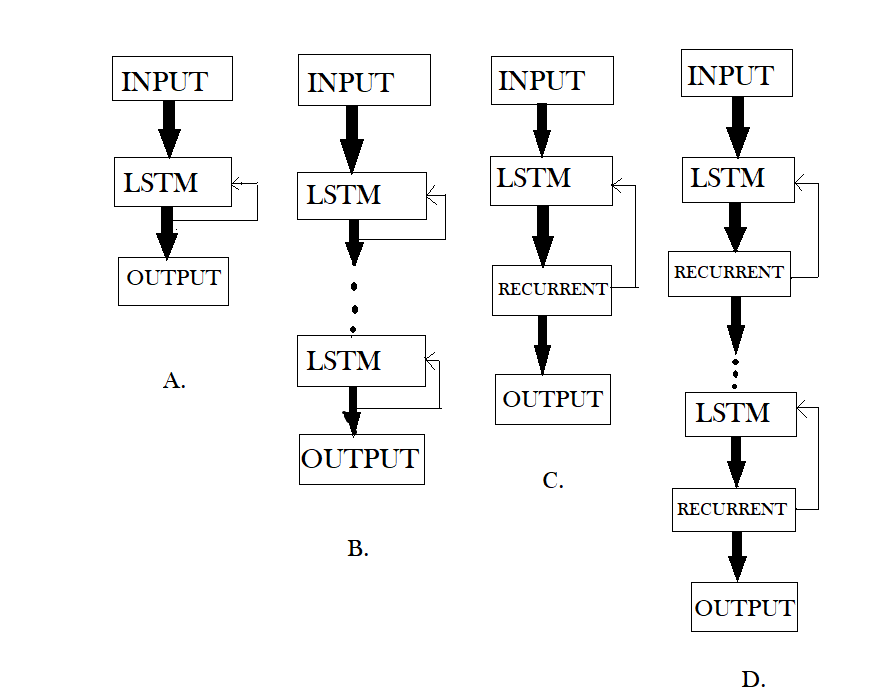

# for this project we use both convlst,  because it gives better accuracy than only conv or only LSTM.
ConvLSTM is a variant of the LSTM network and captures spatial features in multi-dimensional data by convolution process. As LSTM input data is one-dimensional, it is not suitable for spatial sequence data such as video, satellite, and radar image dataset. ConvLSTM is designed for 3-D input data




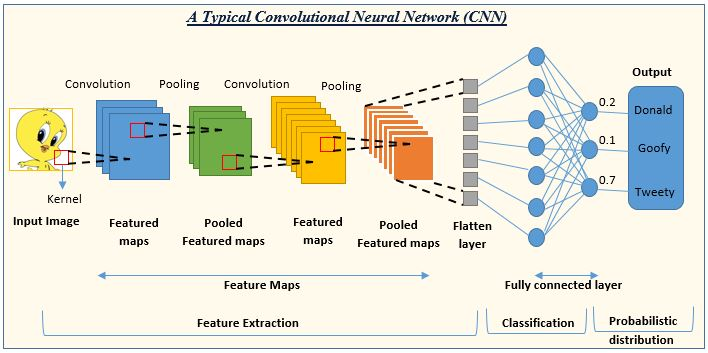

In [10]:
# Import the required libraries.
import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from moviepy.editor import *
%matplotlib inline
#for spliting the data we use inbuilt library train_test_split from sklearn
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

### So lets know about all these libraries which we are going to use in this project

1. numpy: It is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

2. %matplotlib inline 
The line %matplotlib inline is a magic command in Python when you use %matplotlib inline at the beginning of a Jupyter Notebook cell, any subsequent calls to matplotlib's plotting functions (e.g., plt.plot(), plt.imshow()) will result in the generated plots being displayed directly in the notebook output.

3. matplotlib: It is a plotting library for the Python programming language and its numerical mathematics extension NumPy.

4. sklearn: It is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

5. keras: It is an open-source software library that provides a Python interface for artificial neural networks. Keras acts as an interface for the TensorFlow library.

6. tensorflow: It is a free and open-source software library for machine learning. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks. this framework is introduced by google.

7. cv2: It is a library of programming functions mainly aimed at real-time computer vision.

8. os: It is a module that provides a portable way of using operating system dependent functionality.

9. random: It is a module that implements pseudo-random number generators for various distributions.

10. tensorflow.keras.layers: This module provides various types of layers that you can use to build your neural network models. These layers include Dense (fully connected), Conv2D (2D convolutional), LSTM (Long Short-Term Memory), Dropout (regularization by dropping random units), and many others. These layers are the building blocks of your neural network architecture.

11. tensorflow.keras.models: This module contains the Sequential class, which is a linear stack of layers. You can create a neural network model by instantiating a Sequential object and adding layers to it. Alternatively, you can use the functional API provided by Keras to create more complex model architectures, including multiple inputs and outputs or shared layers.

12. tensorflow.keras.utils.to_categorical: This function is used to convert class labels (integers) to one-hot encoded vectors. One-hot encoding is a common representation for categorical data, especially for tasks like classification. It converts an integer label into a binary matrix where each row corresponds to a class, and the index of the "1" in each row represents the class label.

13. tensorflow.keras.callbacks.EarlyStopping: This is a callback function used during the training of a neural network model. It monitors a specified metric (like validation loss) during training and stops the training process if the monitored metric stops improving. This is useful to prevent overfitting and save training time when further training wouldn't lead to better results.

14. tensorflow.keras.utils.plot_model: This function is used to create a visual representation (plot) of a Keras model. It helps you visualize the architecture of your neural network, including the layers, their connections, and the flow of data.






















In [11]:
seed_constant = 10
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

 setting random seeds is a good practice to achieve reproducibility in  project's results. It helps ensure that your experiments are directly comparable and that any differences observed are due to the changes you intentionally made, rather than variations in random initialization.

### **<font style="color:rgb(134,19,348)">Step 1: Visualize the Data with its Labels</font>**

In [12]:
#os.listdir is used to list all the files in the directory
class_names = os.listdir("D:/PROJECT/dataset/data/Files - Human Activity Recognition using TensorFlow (CNN + LSTM)/UCF50")
print(class_names)



['HorseRace', 'Swing', 'WalkingWithDog']


In [13]:
# where 3 is the total number of class in the dataset. 
random_range = random.sample(range(len(class_names)), 3)
print(random_range)

[2, 0, 1]


For visualization, we will pick `3` random categories from the dataset and a random video from each selected category and will visualize the first frame of the selected videos with their associated labels written. This way we’ll be able to visualize a subset ( `3` random videos ) of the dataset.

<Figure size 2400x3000 with 0 Axes>

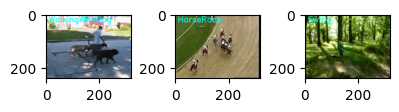

<Figure size 2400x3000 with 0 Axes>

In [14]:
# Iterating through all the generated random values.
for counter, random_index in enumerate(random_range, 1):
    # Retrieve a Class Name using the Random Index.
    selected_class_Name = class_names[random_index]
    # Retrieve the list of all the video files present in the randomly selected Class Directory.
    video_files_names_list = os.listdir(f'D:/PROJECT/dataset/data/Files - Human Activity Recognition using TensorFlow (CNN + LSTM)/UCF50/{selected_class_Name}')
    # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    selected_video_file_name = random.choice(video_files_names_list)
    # Initialize a VideoCapture object to read from the video File.
    video_reader = cv2.VideoCapture(f'D:/PROJECT/dataset/data/Files - Human Activity Recognition using TensorFlow (CNN + LSTM)/UCF50/{selected_class_Name}/{selected_video_file_name}')
    # Read the first frame of the video file.
    _, bgr_frame = video_reader.read()
    # Release the VideoCapture object. 
    video_reader.release()
    # Convert the frame from BGR into RGB format. 
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Write the class name on the video frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
    
    # Display the frame.
    plt.subplot(5, 4, counter);
    plt.imshow(rgb_frame);
    plt.axis('on')
plt.figure(figsize = (24, 30))

### **<font style="color:rgb(134,19,348)">Step 2: Preprocess the Dataset</font>**

Next, we will perform some preprocessing on the dataset. First, we will read the video files from the dataset and resize the frames of the videos to a fixed width and height, to reduce the computations and normalized the data to range `[0-1]` by dividing the pixel values with `255`, which makes convergence faster while training the network.

*But first, let's initialize some constants.*

In [15]:
#height and width to which each video frame will resized
image_height , image_width = 64,64
#number of frames to be considered for each video,here we use frames_per_video this means the number of frames extracted per video and we use 20 frames per video.
frames_per_video = 20
dataset_directory_path = "D:/PROJECT/dataset/data/Files - Human Activity Recognition using TensorFlow (CNN + LSTM)/UCF50"
#list of all the class names
class_names = ['HorseRace', 'Swing', 'WalkingWithDog']

#### ***<font style="color:rgb(134,18,347)">Create a Function to Extract, Resize & Normalize Frames</font>***

We will create a function **`frames_extraction()`** that will create a list containing the resized and normalized frames of a video whose path is passed to it as an argument. The function will read the video file frame by frame, although not all frames are added to the list as we will only need an evenly distributed sequence length of frames. 

In [16]:
# this function is used to extract the frames from the video
def frames_extraction(video_path):
    # Declare a list to store video frames.
    frames_list = []
    # Read the Video File using the VideoCapture object.
    video_reader = cv2.VideoCapture(video_path)
    # Get the total number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    # Calculate the the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/frames_per_video), 1)
    # Iterate through the Video Frames.
    for frame_counter in range(frames_per_video):
        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
        # Reading the frame from the video. 
        success, frame = video_reader.read() 
        # Check if Video frame is not successfully read then break the loop
        if not success:
            break
        # Resize the Frame to fixed height and width.
        resized_frame = cv2.resize(frame, (image_height, image_width))  
        # Normalize used to normalize the pixel values of an frame, the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
        # Append the normalized frame into the frames list
        frames_list.append(normalized_frame)
    # Release the VideoCapture object. 
    video_reader.release()
    # Return the frames list.
    return frames_list

In [17]:
# we are going to create an function for datasets creation that use all data from the dataset directory and create the dataset , that wll iterate through all the classes which is specified in class_names list and will call the function frames_extraction to extract the frames on every videoof the selected classes, and return the frames(features), class index(labels) and video path.

def create_dataset():
    features, labels, video_paths = [], [], []
    # Iterate through all the class.
    for class_index, class_name in enumerate(class_names):
        print(f'Extracting Data of Class: {class_name}')
# Get  list of all video files incurrent Class Directory.
        file_list = os.listdir(os.path.join(dataset_directory_path, class_name))
        # Iterate through all the files in the current Class Directory.
        for file_name in file_list:
            video_files_path = os.path.join(dataset_directory_path, class_name, file_name)
            # Call the function frames_extraction to extract frames from the video file.
            frames = frames_extraction(video_files_path)
            #check if the number of frames extracted are equal to the number of frames per video
            if len(frames) == frames_per_video:
                # Append the extracted frames to the features list.
                features.append(frames)
                # Append the class_index to the labels list.
                labels.append(class_index)
                # Append the video file path to the video_paths list.
                video_paths.append(video_files_path)
    # Return the features list, labels list and video paths list.
    features = np.asarray(features)
    labels = np.asarray(labels)
    return features, labels, video_paths



In [18]:
#Now we will utilize the function **`create_dataset()`** created above to extract the data of the selected classes and create the required dataset.
features, labels, video_paths = create_dataset()

Extracting Data of Class: HorseRace
Extracting Data of Class: Swing
Extracting Data of Class: WalkingWithDog


In [19]:
# Using Keras's to_categorical method to convert labels into one-hot-encoded vectors
# One-hot encoding is a method to represent each categorical label as a binary vector. In a one-hot encoded vector, only one element is "hot" (1), corresponding to the class of the input, while all other elements are "cold" (0). This representation ensures that there is no implied order or relationship between classes
one_hot_encoded_labels = to_categorical(labels)
print(one_hot_encoded_labels)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


### ***<font style="color:rgb(134,19,340)">Step 3: Split the Data into Train and Test Set</font>***

As of now, we have the required **`features`** (a NumPy array containing all the extracted frames of the videos) and **`one_hot_encoded_labels`** (also a Numpy array containing all class labels in one hot encoded format). So now, we will split our data to create training and testing sets. We will also shuffle the dataset before the split to avoid any bias and get splits representing the overall distribution of the data.

In [20]:
# here we split the data into training(70%) and testing data(30%)
X_train, X_test, y_train, y_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.3, shuffle=True, random_state = seed_constant)

### ***<font>Step 4: Implement the ConvLSTM Approach</font>***

In this step, we will implement the first approach by using a combination of ConvLSTM cells. A ConvLSTM cell is a variant of an LSTM network that contains convolutions operations in the network. it is an LSTM with convolution embedded in the architecture, which makes it capable of identifying spatial features of the data while keeping into account the temporal relation. 

<center>
<img src="https://drive.google.com/uc?export=view&id=1KHN_JFWJoJi1xQj_bRdxy2QgevGOH1qP" width= 500px>
</center>


For video classification, this approach effectively captures the spatial relation in the individual frames and the temporal relation across the different frames. As a result of this convolution structure, the ConvLSTM is capable of taking in 3-dimensional input `(width, height, num_of_channels)` whereas a simple LSTM only takes in 1-dimensional input hence an LSTM is incompatible for modeling Spatio-temporal data on its own.

You can read the paper [**Convolutional LSTM Network: A Machine Learning Approach for Precipitation Nowcasting**](https://arxiv.org/abs/1506.04214v1) by **Xingjian Shi** (NIPS 2015), to learn more about this architecture.


the num_of_channels refers to the number of feature maps or color channels in each input frame of the sequence. Each channel might represent different aspects of the image, such as color information, edges, textures, or any other learned features.


### ***<font>Step 4.1: Construct the Model</font>***


To construct the model, we will use Keras [**`ConvLSTM2D`**](https://keras.io/api/layers/recurrent_layers/conv_lstm2d) recurrent layers. The **`ConvLSTM2D`** layer also takes in the number of filters and kernel size required for applying the convolutional operations. The output of the layers is flattened in the end and is fed to the **`Dense`** layer with softmax activation which outputs the probability of each action category. 

We will also use **`MaxPooling3D`** layers to reduce the dimensions of the frames and avoid unnecessary computations and **`Dropout`** layers to prevent [overfitting](https://en.wikipedia.org/wiki/Overfitting) the model on the data. The architecture is a simple one and has a small number of trainable parameters. This is because we are only dealing with a small subset of the dataset which does not require a large-scale model.

### MODEL SUMMARY:
    sequential model is used to create a linear stack of layers by passing a list of layer instances to the constructor 
    ConvLSTM2D is used to create a convolutional LSTM network, that includes convolutional operations within the recurrent structure. It's used for processing spatiotemporal data, such as sequences of images or videos.
    filters is The number of filters (or hidden units) in the layer. Filters are similar to neurons in a traditional neural network layer. They learn to capture different features from the input data.The more filters we have, the more complex features our network can learn to extract. in this case we use 64 filters

    kernel_size{The size of the convolutional kernel (also known as filter size) } is used to specify the height and width of the 2D convolution window becuase we are using 3,3 so the height and width of the 2D convolution window will be 3,3 

    activation function is used to introduce non-linearity to the network. It transforms the summed weighted input from the node into the activation of the node or output for that input. In this case we use tanh activation function means The tanh activation function, short for hyperbolic tangent activation function, is a common mathematical function used in neural networks and other machine learning models. It's a nonlinear activation function that maps input values to a range between -1 and 1.

    data_format parameter: specifies the order of dimensions in the input data tensor. When data_format is set to "channels_last", it means that the channel dimension is the last dimension of the input tensor.
    channels_last": This means that the input data tensor is organized with the shape (batch_size, height, width, channels). 
    The batch size is a number of samples processed before the model is updated,we recommend trying smaller batch sizes first(usually 32 or 64), also keeping in mind that small batch sizes require small learning rates. The number of batch sizes should be a power of 2 to take full advantage of the GPUs processing..

[*recurrent_dropout*] is a parameter commonly used(can prevent overfitting) in recurrent layers of neural networks, such as LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit) layers. It is used to control the dropout regularization specifically within the recurrent units of the layer during training. #Dropout is a regularization technique for reducing overfitting in neural networks by preventing complex co-adaptations on training data. It is a very efficient way of performing model averaging with neural networks.
<!-- <center>
<img src="https://production-media.paperswithcode.com/methods/Screen_Shot_2020-06-06_at_1.22.45_PM.png" width=500px></center> -->

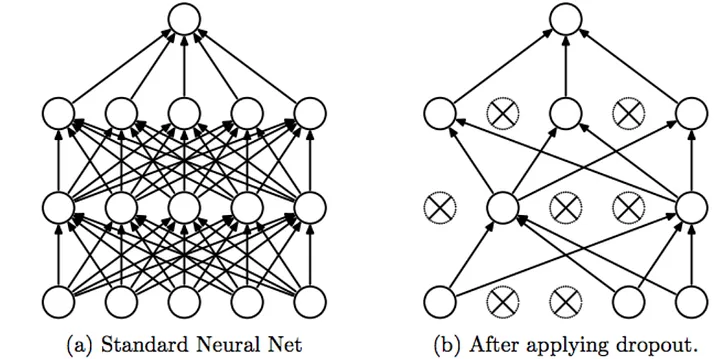

    input_shape: The shape of the input data that the layer expects. It's a tuple (frames_per_video, image_height, image_width, 3) where: frames_per_video: The number of frames in a video sequence,image_height: The height of each frame (vertical dimension),image_width: The width of each frame (horizontal dimension).
    
    The number of color channels in each frame (RGB images).
    padding: The padding mode to apply to the input data. 'same' padding means that the output will have the same spatial dimensions as the input, and any missing values will be filled with appropriate padding. 'valid' padding means no padding is applied, and the output will have reduced spatial dimensions compared to the input.

    return_sequences: A boolean value indicating whether the layer should return the full sequence of outputs or only the output at the last time step. Setting it to True means that the layer will return the full sequence, which is suitable for cases when you want to pass the output to subsequent recurrent layers.

[**'Maxpooling3d'**](https://keras.io/api/layers/pooling_layers/max_pooling3d/) operation for 3D data (spatial or spatio-temporal). Downsamples the input along its spatial dimensions (depth, height, and width) by taking the maximum value over an input window (of size defined by pool_size ) for each channel of the input. The window is shifted by strides along each dimension.

[**TimeDistributedlayer""](https://keras.io/api/layers/recurrent_layers/time_distributed/) This wrapper allows to apply a layer to every temporal slice of an input.
Every input should be at least 3D, and the dimension of index one of the first input will be considered to be the temporal dimension.

[*Flattening*] is used to convert all the resultant 2-Dimensional arrays from pooled feature maps into a single long continuous linear vector. The flattened matrix is fed as input to the fully connected layer to classify the image]





In [21]:
def create_model_convlstm():
    model = Sequential()
    model.add(ConvLSTM2D(filters=4, kernel_size=(3, 3),activation = 'tanh',data_format = "channels_last",recurrent_dropout=0.2, input_shape=(frames_per_video, image_height, image_width, 3), padding='same', return_sequences=True))
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same',data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters=8, kernel_size=(3, 3),activation = 'tanh',data_format = "channels_last",recurrent_dropout=0.2, input_shape=(frames_per_video, image_height, image_width, 3), padding='same', return_sequences=True))
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same',data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))

    model.add(ConvLSTM2D(filters=14, kernel_size=(3, 3),activation = 'tanh',data_format = "channels_last",recurrent_dropout=0.2, input_shape=(frames_per_video, image_height, image_width, 3), padding='same', return_sequences=True))
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same',data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))

    model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),activation = 'tanh',data_format = "channels_last",recurrent_dropout=0.2, input_shape=(frames_per_video, image_height, image_width, 3), padding='same', return_sequences=True))
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same',data_format='channels_last'))
    # model.add(TimeDistributed(Dropout(0.2)))
    model.add(Flatten())
    model.add(Dense(len(class_names), activation='softmax'))

    model.summary()
    return model





In [35]:
convlstm_model = create_model_convlstm()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 20, 64, 64, 4)     1024      
                                                                 
 max_pooling3d (MaxPooling3  (None, 20, 32, 32, 4)     0         
 D)                                                              
                                                                 
 time_distributed (TimeDist  (None, 20, 32, 32, 4)     0         
 ributed)                                                        
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 20, 32, 32, 8)     3488      
                                                                 
 max_pooling3d_1 (MaxPoolin  (None, 20, 16, 16, 8)     0         
 g3D)                                                            
                                                        

The [**'EarlyStopping'**] feature helps stop training a model when it's no longer improving. It pays attention to a chosen measurement, like validation loss (val_loss), which should get smaller for better results. If the measurement doesn't improve for a certain number of epochs (like 10), training is halted to avoid overfitting. The "restore_best_weights" option saves the best version of the model's parameters, so even if training stops early, you keep the best setup.

In [39]:
# Compile the model.
# Create an Instance of Early Stopping Callback
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics values to the model
convlstm_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])


In [40]:
# Train the Model
history = convlstm_model.fit(X_train, y_train, epochs = 100, batch_size = 16, validation_split = 0.2, callbacks = [early_stopping_callback])


Epoch 1/100
14/14 [==============================] - 53s 3s/step - loss: 1.0916 - accuracy: 0.3565 - val_loss: 1.1102 - val_accuracy: 0.2407
Epoch 2/100
14/14 [==============================] - 43s 3s/step - loss: 1.0825 - accuracy: 0.5046 - val_loss: 1.0682 - val_accuracy: 0.4259
Epoch 3/100
14/14 [==============================] - 43s 3s/step - loss: 1.0179 - accuracy: 0.5509 - val_loss: 0.9304 - val_accuracy: 0.7593
Epoch 4/100
14/14 [==============================] - 45s 3s/step - loss: 0.9240 - accuracy: 0.6065 - val_loss: 0.7228 - val_accuracy: 0.7037
Epoch 5/100
14/14 [==============================] - 44s 3s/step - loss: 0.8421 - accuracy: 0.6389 - val_loss: 0.7892 - val_accuracy: 0.6852
Epoch 6/100
14/14 [==============================] - 45s 3s/step - loss: 0.7494 - accuracy: 0.6435 - val_loss: 0.5859 - val_accuracy: 0.8148
Epoch 7/100
14/14 [==============================] - 45s 3s/step - loss: 0.5941 - accuracy: 0.7407 - val_loss: 0.5737 - val_accuracy: 0.8333
Epoch 8/100
1

In [41]:
# Evaluate the trained model.
model_evaluation_history = convlstm_model.evaluate(X_test, y_test)

4/4 [==============================] - 3s 828ms/step - loss: 0.6295 - accuracy: 0.8291


In [47]:
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history

In [43]:
convlstm_model.save( 'D:/PROJECT/dataset/data/Files - Human Activity Recognition using TensorFlow (CNN + LSTM)/UCF50/new_model.h5')


### ***<font>Plot models loss and accuracy curves </font>***

In [48]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    '''
    This function will plot the metrics passed to it in a graph.
    Args:
        model_training_history: A history object containing a record of training and validation 
                                loss values and metrics values at successive epochs
        metric_name_1:          The name of the first metric that needs to be plotted in the graph.
        metric_name_2:          The name of the second metric that needs to be plotted in the graph.
        plot_name:              The title of the graph.
    '''
    
    # Get metric values using metric names as identifiers.
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    
    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(metric_value_1))

    # Plot the Graph.
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    # Add title to the plot.
    plt.title(str(plot_name))

    # Add legend to the plot.
    plt.legend()

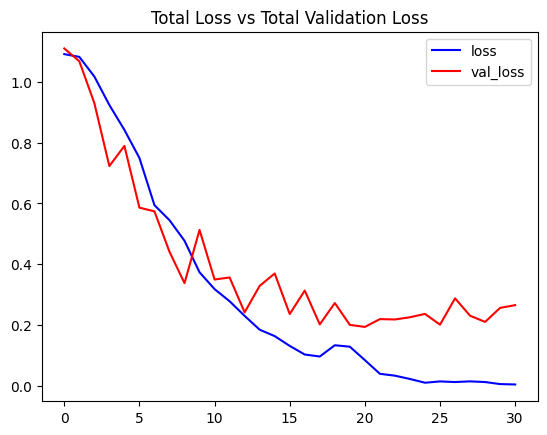

In [49]:
# Visualize the training and validation loss metrices.
plot_metric(history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

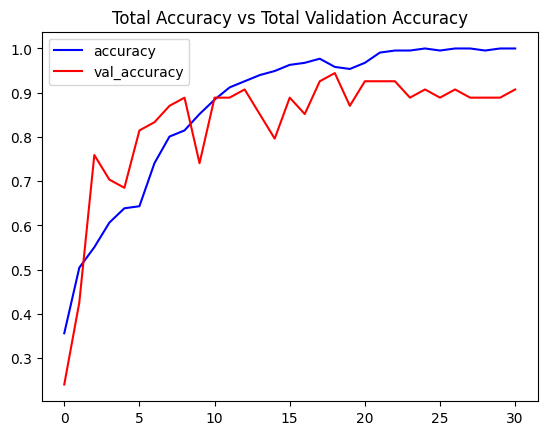

In [50]:
# Visualize the training and validation accuracy metrices.
plot_metric(history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy') 

# now test model on videos

In [22]:
test_video_dir = 'D:/PROJECT/dataset/data/Files - Human Activity Recognition using TensorFlow (CNN + LSTM)/test_videos'
input_video = 'D:/PROJECT/dataset/data/Files - Human Activity Recognition using TensorFlow (CNN + LSTM)/test_videos/video.mp4'

In [26]:
convlstm_model = tf.keras.models.load_model('D:/PROJECT/dataset/data/Files - Human Activity Recognition using TensorFlow (CNN + LSTM)/new_model.h5')

In [27]:
def predict_on_video(video_file_path, output_file_path, frames_per_video):

    # Initialize the VideoCapture object to read from the video file.
    video_reader = cv2.VideoCapture(video_file_path)

    # Get the width and height of the video.
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Initialize the VideoWriter Object to store the output video in the disk.
    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('M', 'P', '4', 'V'), 
                                   video_reader.get(cv2.CAP_PROP_FPS), (original_video_width, original_video_height))

    # Declare a queue to store video frames.
    frames_queue = deque(maxlen = frames_per_video)

    # Initialize a variable to store the predicted action being performed in the video.
    predicted_class_name = ''

    # Iterate until the video is accessed successfully.
    while video_reader.isOpened():

        # Read the frame.
        ok, frame = video_reader.read() 
        
        # Check if frame is not read properly then break the loop.
        if not ok:
            break

        # Resize the Frame to fixed Dimensions.
        resized_frame = cv2.resize(frame, (image_height, image_width))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1.
        normalized_frame = resized_frame / 255

        # Appending the pre-processed frame into the frames list.
        frames_queue.append(normalized_frame)

        # Check if the number of frames in the queue are equal to the fixed sequence length.
        if len(frames_queue) == frames_per_video:

            # Pass the normalized frames to the model and get the predicted probabilities.
            predicted_labels_probabilities = convlstm_model.predict(np.expand_dims(frames_queue, axis = 0))[0]

            # Get the index of class with highest probability.
            predicted_label = np.argmax(predicted_labels_probabilities)

            # Get the class name using the retrieved index.
            predicted_class_name = class_names[predicted_label]

        # Write predicted class name on top of the frame.
        cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.imshow("Annotated Video", frame)  # Display the annotated frame
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
         # Wait for a short duration (1ms) to show the frame

    video_reader.release()
    cv2.destroyAllWindows()

    #     # Write The frame into the disk using the VideoWriter Object.
    #     video_writer.write(frame)
        
    # # Release the VideoCapture and VideoWriter objects.
    # video_reader.release()
    # video_writer.release()

In [28]:
# Construct the output video path.
output_video_file_path = f'{test_video_dir}/-Output-SeqLen{frames_per_video}.mp4'

# Perform Action Recognition on the Test Video.
predict_on_video(input_video, output_video_file_path, frames_per_video)
# Display the output video.


1/1 [==============================] - 0s 35ms/step
